In [45]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns           # For statistical data visualization
import warnings                 # For handling warning messages

# Suppress warning messages for cleaner output
warnings.filterwarnings('ignore')


# CONFIGURE VISUALIZATION SETTINGS

# Set the default style for all plots to 'whitegrid' for better readability
sns.set_style('whitegrid')

# Set default figure size for all plots (width=12 inches, height=6 inches)
plt.rcParams['figure.figsize'] = (12, 6)

In [46]:
# print header
print("="*80)
print("LOAN PREDICTION USING MACHINE LEARNING")
print("="*80)

LOAN PREDICTION USING MACHINE LEARNING


In [47]:
# Load CSV file
df = pd.read_csv("data/loan-dataset.csv")

In [140]:
# Check current values
print("Original Loan_Amount_Term values:")
print(df['loan_amount_term'].value_counts().sort_index())

# Divide by 10 to convert 360 → 36, 120 → 12, etc.
df['loan_amount_term'] = (df['loan_amount_term'] / 10).astype(int)

# Verify the change
print("\nConverted Loan_Amount_Term values (in months):")
print(df['loan_amount_term'].value_counts().sort_index())

Original Loan_Amount_Term values:
loan_amount_term
12       1
36       2
60       3
80       1
84       4
90       2
120      3
180     53
240      4
300     13
360    513
480     15
Name: count, dtype: int64

Converted Loan_Amount_Term values (in months):
loan_amount_term
1       1
3       2
6       3
8       5
9       2
12      3
18     53
24      4
30     13
36    513
48     15
Name: count, dtype: int64


In [141]:
# Check first 5 rows
df.head()

,female,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,0,0,1,0,5849.0,0.0,454.0,36,1,2,1
1,0,1,1,1,0,4583.0,1508.0,128.0,36,1,0,0
2,0,1,0,1,1,3000.0,0.0,66.0,36,1,2,1
3,0,1,0,0,0,2583.0,2358.0,120.0,36,1,2,1
4,0,0,0,1,0,6000.0,0.0,141.0,36,1,2,1


In [142]:
# Drop all the dummy columns created from loan_id
df = df.drop(columns=['loan_id'], errors='ignore')

In [143]:
df.columns = df.columns.str.lower().str.replace('-', '_')
print(df.columns)

Index(['female', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')


In [144]:
# Check column names
df.columns

Index(['female', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [145]:
# Info about columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female             614 non-null    int64  
 1   married            614 non-null    int64  
 2   dependents         614 non-null    int64  
 3   education          614 non-null    int64  
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    float64
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    int64  
 9   credit_history     614 non-null    int64  
 10  property_area      614 non-null    int64  
 11  loan_status        614 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 57.7 KB


In [146]:
# Count of null values in each column
df.isnull().sum()

female               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [147]:
#get mean, median, min, max
df.describe()

,female,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.203583,0.649837,0.785016,0.781759,0.177524,5403.459283,1623.971987,157.226384,33.789902,0.827362,1.037459,0.687296
std,0.402991,0.477410,1.021484,0.413389,0.382423,6109.041673,2925.530175,117.933370,7.063670,0.378243,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,101.250000,36.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1211.500000,129.000000,36.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,172.000000,36.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,960.000000,48.000000,1.000000,2.000000,1.000000


In [148]:
df.dtypes

female                 int64
married                int64
dependents             int64
education              int64
self_employed          int64
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term       int64
credit_history         int64
property_area          int64
loan_status            int64
dtype: object

In [149]:
df.describe(include='all')

,female,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.203583,0.649837,0.785016,0.781759,0.177524,5403.459283,1623.971987,157.226384,33.789902,0.827362,1.037459,0.687296
std,0.402991,0.477410,1.021484,0.413389,0.382423,6109.041673,2925.530175,117.933370,7.063670,0.378243,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,101.250000,36.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1211.500000,129.000000,36.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,172.000000,36.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,960.000000,48.000000,1.000000,2.000000,1.000000


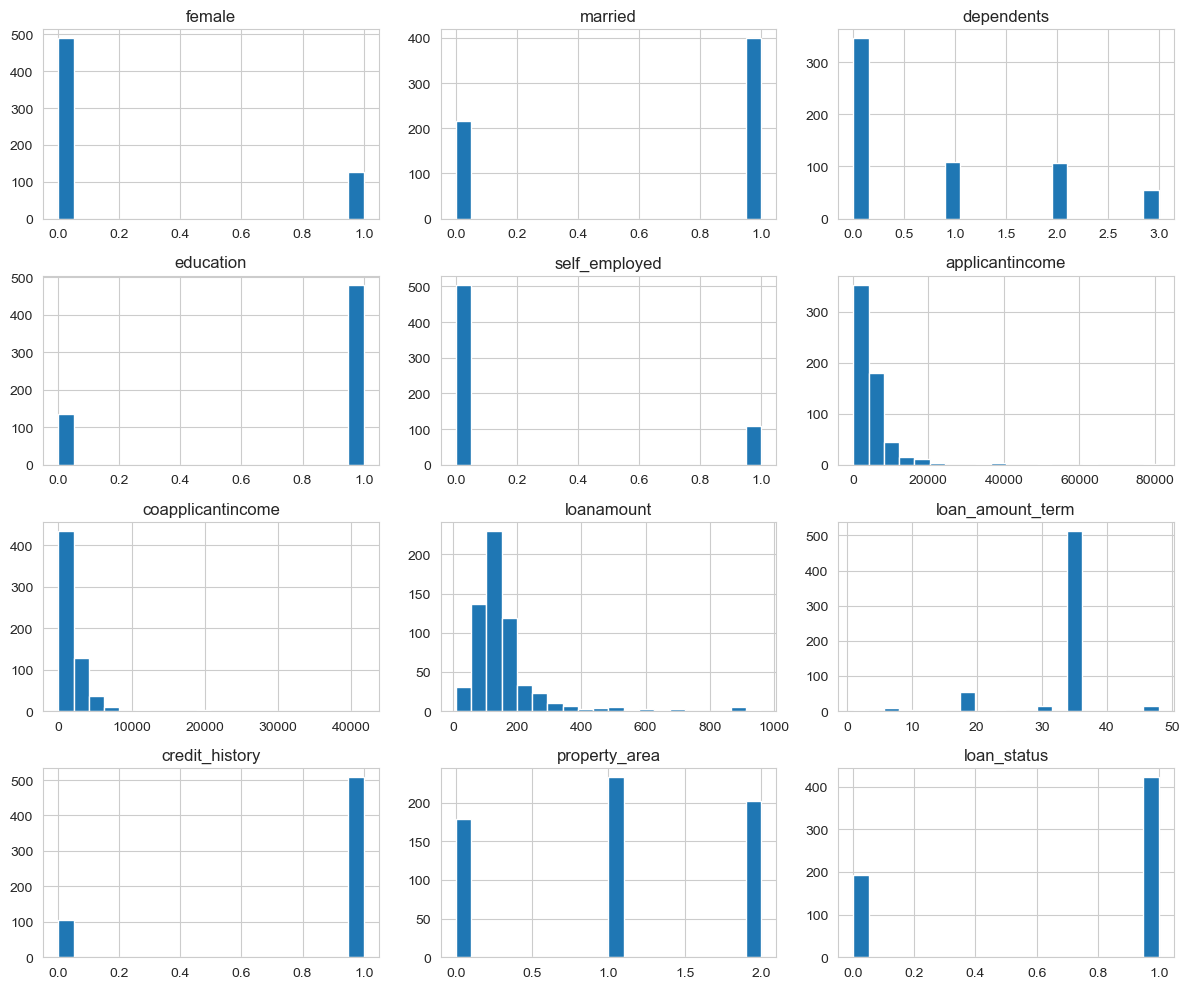

In [150]:
# Distribution of numerical features
import matplotlib.pyplot as plt

# Histogram for all numeric columns
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [151]:
# Categorical features
# Count of each category
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print("\n")

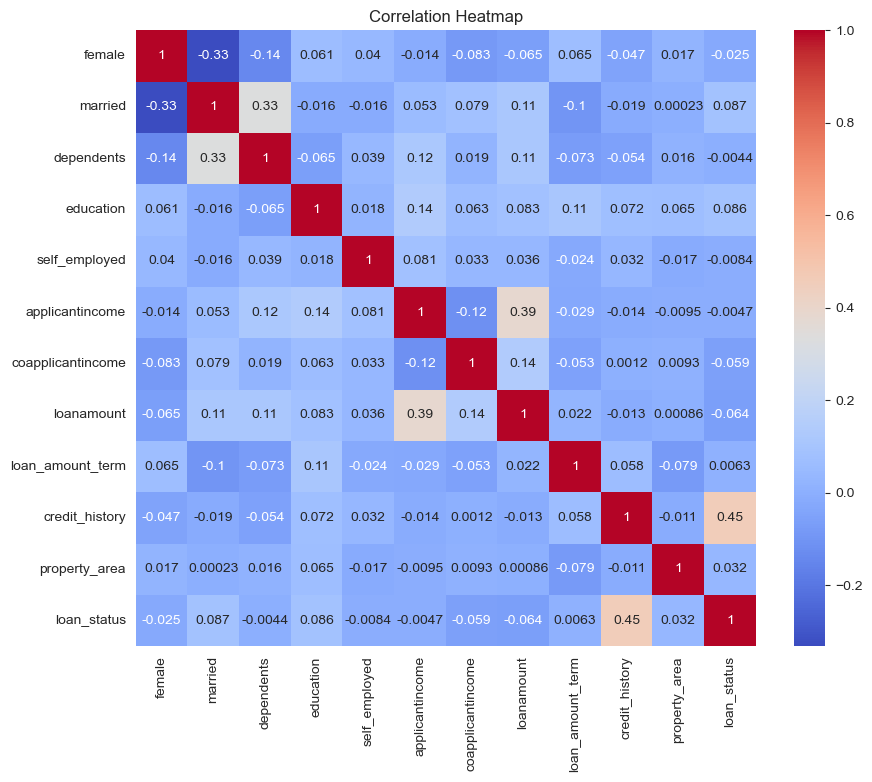

In [152]:
#visualizes the Pearson correlation coefficient, which measures the strength and direction of linear relationships between pairs of variables.

#correlation heatmap, 

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now compute correlation
corr = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [153]:
import pandas as pd

# Separate target
y = df['loan_status']
X = df.drop('loan_status', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Check shape
print(X.shape)

(614, 11)


In [154]:
# One-hot encoding
# 1. Manually redefine cat_cols WITHOUT 'Loan_ID'
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# 2. OR dynamically remove it if you're not sure about the spelling:
cat_cols = [col for col in cat_cols if col in df.columns]

# 3. Now this will work:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [155]:
# Run this first to see which columns are still strings
print(X_train.dtypes)
print(X_train.select_dtypes(include='object').columns.tolist())

female                 int64
married                int64
dependents             int64
education              int64
self_employed          int64
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term       int64
credit_history         int64
property_area          int64
dtype: object
[]


In [156]:
#Split data to training and test set
from sklearn.model_selection import train_test_split

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)



X_train shape: (429, 11)
X_test shape : (185, 11)


In [157]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [158]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 11)
X_test shape: (185, 11)
y_train shape: (429,)
y_test shape: (185,)


In [159]:
#penalize mistakes on rejections.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

# Initialize the model
lr.fit(X_train, y_train)

# 2. FIT THE MODEL (This is the missing step!)
lr.fit(X_train, y_train)

# Train the model on training data
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [168]:
# STEP 4: Apply threshold
y_pred_final = (y_probs > 0.40).astype(int)

# Evaluate
print("="*70)
print("         FINAL MODEL")
print("="*70)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

         FINAL MODEL

Confusion Matrix:
[[ 35  23]
 [ 10 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        58
           1       0.84      0.92      0.88       127

    accuracy                           0.82       185
   macro avg       0.81      0.76      0.78       185
weighted avg       0.82      0.82      0.81       185



In [169]:
#Make predictions
# Predict on the test set
y_pred = lr.predict(X_test)

In [170]:
# Predict on test dataset
y_pred = lr.predict(X_test)

# Compare first 5 predictions with actual values
import pandas as pd

pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [171]:
# 1. Train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

# 2. Verify it exists immediately
if hasattr(lr, 'coef_'):
    print("Success! Model is fitted.")
    
    # 3. Create the DataFrame
    coef_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lr.coef_[0]
    }).sort_values('Coefficient', ascending=True)

    # ... [Rest of your plotting code here] ...
    
    # Show the top 5 for immediate confirmation
    print(coef_df.tail(5))
else:
    print("The model still isn't fitting. Check if X_train is empty.")

Success! Model is fitted.
           Feature  Coefficient
10   property_area     0.133860
2       dependents     0.142390
1          married     0.372263
3        education     0.398561
9   credit_history     2.245100


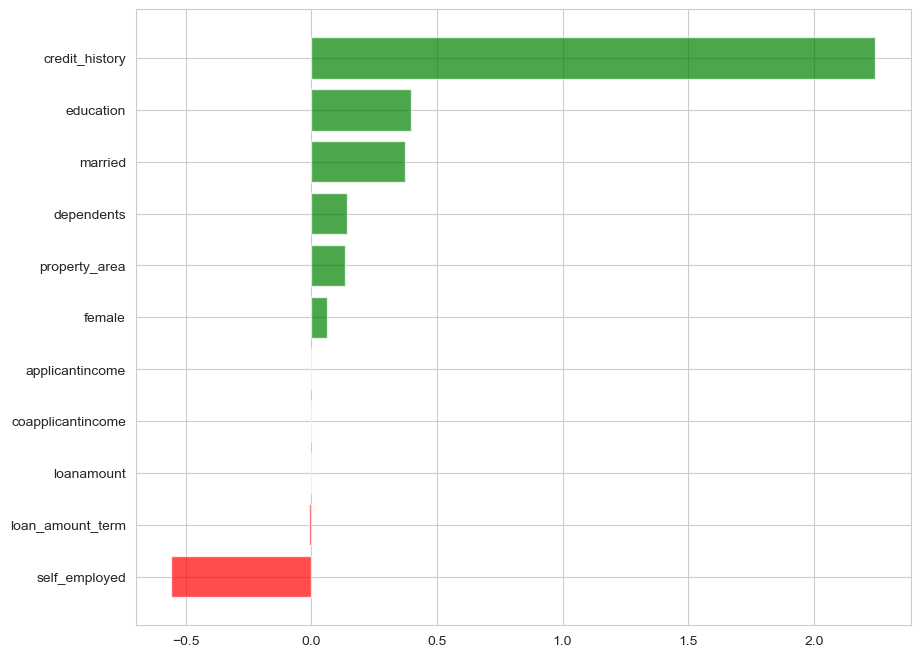

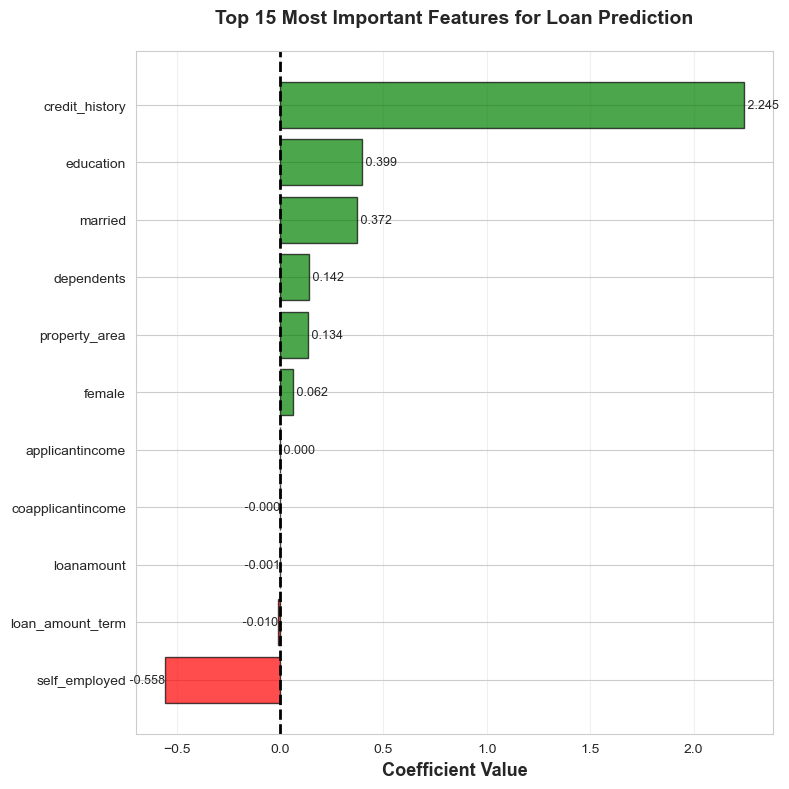


FEATURE IMPORTANCE SUMMARY

Top 5 Features INCREASING Loan Approval (Positive Impact):
           Feature  Coefficient  abs_coef
10   property_area     0.133860  0.133860
2       dependents     0.142390  0.142390
1          married     0.372263  0.372263
3        education     0.398561  0.398561
9   credit_history     2.245100  2.245100


Top 5 Features DECREASING Loan Approval (Negative Impact):
             Feature  Coefficient  abs_coef
4      self_employed    -0.558031  0.558031
8   loan_amount_term    -0.009822  0.009822
7         loanamount    -0.001098  0.001098
6  coapplicantincome    -0.000030  0.000030
5    applicantincome     0.000003  0.000003


In [172]:
# Coefficient Plot (Most Important for Interpretation)
# Shows which features matter most and their direction
import pandas as pd
import matplotlib.pyplot as plt

# Get feature coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', ascending=True)

# Create figure with proper spacing
fig, ax = plt.subplots(figsize=(10, max(8, len(coef_df) * 0.3)))  # Dynamic height

# Create color map
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]

# Plot horizontal bar chart
ax.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, alpha=0.7)

# Set y-axis labels with proper spacing
ax.set_yticks(range(len(coef_df)))
ax.set_yticklabels(coef_df['Feature'], fontsize=10)

# Show only top 15 most impactful features
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
top_15 = coef_df.nlargest(15, 'abs_coef').sort_values('Coefficient')

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red' if x < 0 else 'green' for x in top_15['Coefficient']]
bars = ax.barh(top_15['Feature'], top_15['Coefficient'], color=colors, alpha=0.7, edgecolor='black')

ax.set_xlabel('Coefficient Value', fontsize=13, fontweight='bold')
ax.set_title('Top 15 Most Important Features for Loan Prediction', 
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_15['Coefficient'])):
    ax.text(val, bar.get_y() + bar.get_height()/2, 
            f' {val:.3f}', va='center', fontsize=9,
            ha='left' if val > 0 else 'right')

plt.tight_layout()
plt.show()

# Print numerical summary
print("\n" + "="*60)
print("FEATURE IMPORTANCE SUMMARY")
print("="*60)
print("\nTop 5 Features INCREASING Loan Approval (Positive Impact):")
print(coef_df.tail(5).to_string())

print("\n\nTop 5 Features DECREASING Loan Approval (Negative Impact):")
print(coef_df.head(5).to_string())
# Interpretation: 
# Positive = increases loan approval probability
# Negative = decreases loan approval probability

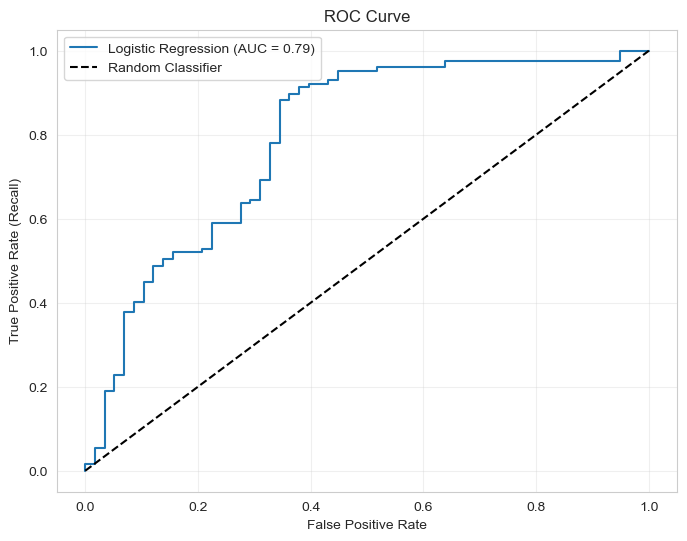

In [173]:
#ROC Curve (Model Performance)
#Shows trade-off between catching defaults vs false alarms
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


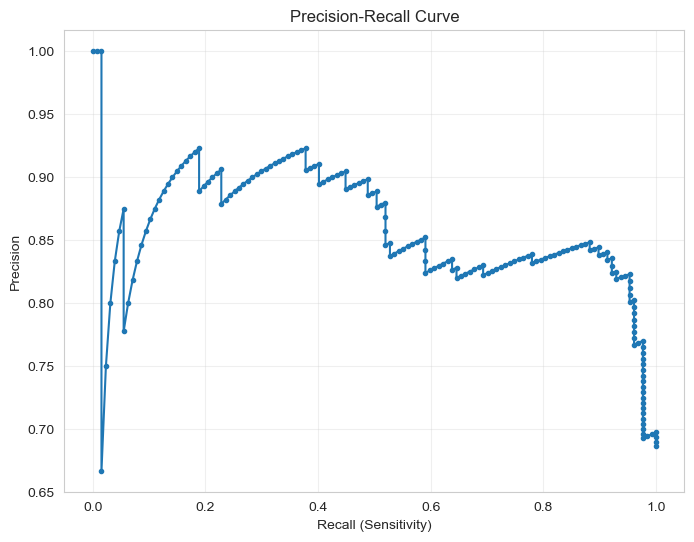

In [174]:
#Precision-Recall Curve (Better for Imbalanced Data)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.show()

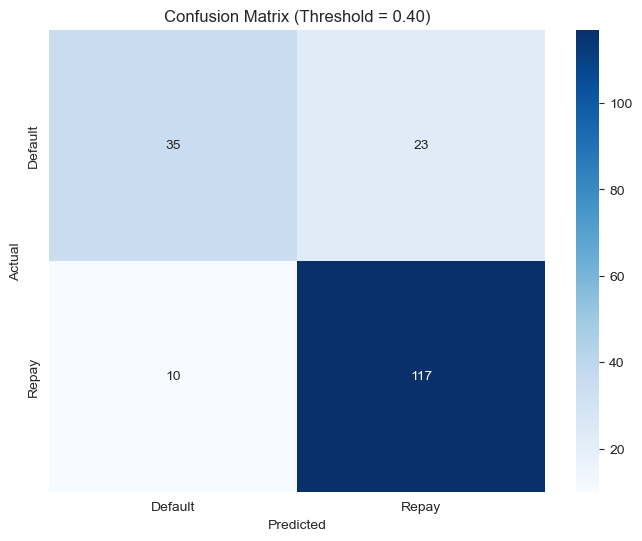

In [122]:
# Confusion Matrix Heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_final)  # ← Changed this line!

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Default', 'Repay'],
            yticklabels=['Default', 'Repay'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.40)')  # Updated title
plt.show()

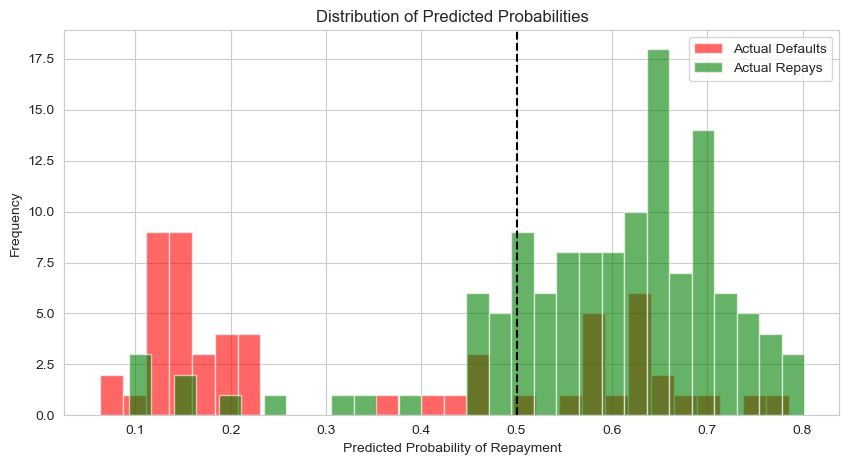

In [175]:
# Probability Distribution (Risk Segmentation)
plt.figure(figsize=(10, 5))
plt.hist(y_probs[y_test == 0], bins=30, alpha=0.6, label='Actual Defaults', color='red')
plt.hist(y_probs[y_test == 1], bins=30, alpha=0.6, label='Actual Repays', color='green')
plt.xlabel('Predicted Probability of Repayment')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.axvline(x=0.5, color='black', linestyle='--', label='Default Threshold')
plt.show()

In [176]:
print(X_train.columns.tolist())

['female', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area']


In [177]:
# Test Case 1: High-risk
high_risk = pd.DataFrame({
    'female':            [0],   # Male
    'married':           [0],   # Single
    'dependents':        [0],
    'education':         [0],   # Not Graduate
    'self_employed':     [1],
    'applicantincome':   [2000],
    'coapplicantincome': [0],
    'loanamount':        [200],
    'loan_amount_term':  [360],
    'credit_history':    [0],   # ❌ No credit history
    'property_area':     [0]    # Rural
})

# Test Case 2: Low-risk
low_risk = pd.DataFrame({
    'female':            [0],   # Male
    'married':           [1],
    'dependents':        [1],
    'education':         [1],   # Graduate
    'self_employed':     [0],
    'applicantincome':   [8000],
    'coapplicantincome': [3000],
    'loanamount':        [150],
    'loan_amount_term':  [360],
    'credit_history':    [1],   # ✅ Good credit
    'property_area':     [1]    # Semiurban
})

# Test Case 3: Medium-risk
medium_risk = pd.DataFrame({
    'female':            [1],   # Female
    'married':           [1],
    'dependents':        [2],
    'education':         [1],   # Graduate
    'self_employed':     [0],
    'applicantincome':   [4000],
    'coapplicantincome': [1500],
    'loanamount':        [180],
    'loan_amount_term':  [360],
    'credit_history':    [1],   # ✅ Good credit
    'property_area':     [2]    # Urban
})

# Predict
test_applicant(high_risk,   "HIGH RISK: Self-employed, no credit history, not graduate")
test_applicant(low_risk,    "LOW RISK: Married, good credit, graduate, high income")
test_applicant(medium_risk, "MEDIUM RISK: Married, good credit, moderate income")


HIGH RISK: Self-employed, no credit history, not graduate
Probability of Repayment : 0.19%
Prediction: ❌ REJECT (Will Default)
Confidence: 99.6%

LOW RISK: Married, good credit, graduate, high income
Probability of Repayment : 7.98%
Prediction: ❌ REJECT (Will Default)
Confidence: 84.0%

MEDIUM RISK: Married, good credit, moderate income
Probability of Repayment : 10.85%
Prediction: ❌ REJECT (Will Default)
Confidence: 78.3%


In [178]:
# Test model stability across different data splits:

from sklearn.model_selection import cross_validate

# Use your existing X and y from the train-test split preparation
# Combine them back temporarily for cross-validation
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

print(f"Full dataset shape: {X_full.shape}\n")

# 5-Fold Cross-Validation
lr_cv = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

cv_results = cross_validate(
    lr_cv, X_full, y_full, 
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

print("="*70)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("="*70)
print(f"\nAccuracy:  {cv_results['test_accuracy'].mean():.2%} (+/- {cv_results['test_accuracy'].std()*2:.2%})")
print(f"Precision: {cv_results['test_precision'].mean():.2%} (+/- {cv_results['test_precision'].std()*2:.2%})")
print(f"Recall:    {cv_results['test_recall'].mean():.2%} (+/- {cv_results['test_recall'].std()*2:.2%})")
print(f"F1-Score:  {cv_results['test_f1'].mean():.2%} (+/- {cv_results['test_f1'].std()*2:.2%})")

print("\n📊 Individual Fold Scores:")
for i in range(5):
    print(f"Fold {i+1}: Accuracy = {cv_results['test_accuracy'][i]:.2%}")

print(f"\n🔍 Overfitting Check:")
print(f"Train Accuracy: {cv_results['train_accuracy'].mean():.2%}")
print(f"Test Accuracy:  {cv_results['test_accuracy'].mean():.2%}")
print(f"Difference:     {(cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean())*100:.1f}%")

if cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean() < 0.05:
    print("✅ Model generalizes well (no significant overfitting)")
else:
    print("⚠️ Possible overfitting detected")

Full dataset shape: (614, 11)

5-FOLD CROSS-VALIDATION RESULTS

Accuracy:  72.81% (+/- 5.96%)
Precision: 78.56% (+/- 6.72%)
Recall:    83.40% (+/- 6.66%)
F1-Score:  80.82% (+/- 4.09%)

📊 Individual Fold Scores:
Fold 1: Accuracy = 71.54%
Fold 2: Accuracy = 76.42%
Fold 3: Accuracy = 69.11%
Fold 4: Accuracy = 70.73%
Fold 5: Accuracy = 76.23%

🔍 Overfitting Check:
Train Accuracy: 76.06%
Test Accuracy:  72.81%
Difference:     3.3%
✅ Model generalizes well (no significant overfitting)


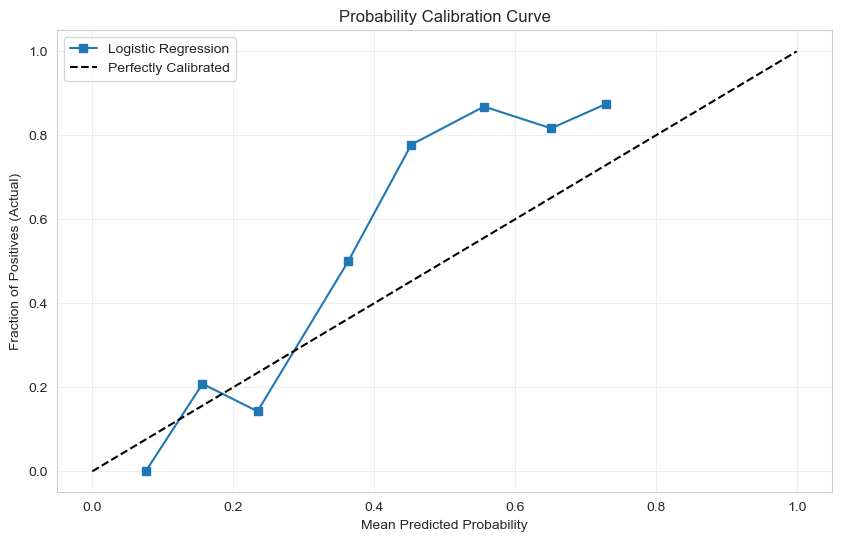


📊 Interpretation:
If the line follows the diagonal closely, probabilities are well-calibrated.
If it's above: Model is underconfident
If it's below: Model is overconfident


In [130]:
# Probability Calibration Check

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get probabilities
y_probs = lr.predict_proba(X_test)[:, 1]

# Calculate calibration
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, y_probs, n_bins=10, strategy='uniform'
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (Actual)')
plt.title('Probability Calibration Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\n📊 Interpretation:")
print("If the line follows the diagonal closely, probabilities are well-calibrated.")
print("If it's above: Model is underconfident")
print("If it's below: Model is overconfident")

In [179]:
import os
os.getcwd()

'C:\\Users\\stacy\\loan-prediction-ml'

In [180]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("model", exist_ok=True)

os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'data',
 'model',
 'README.md',
 'requirements.txt',
 'runtime.txt',
 'train_model.ipynb']

In [181]:
import pandas as pd
pd.read_csv("data/loan-dataset.csv")

,Loan_ID,Female,Married,Dependents,Education,Self-Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan-status
0,LP001002,Male,0,0,Graduate,0,5849.0,0.0,454.0,360,1,Urban,1
1,LP001003,Male,1,1,Graduate,0,4583.0,1508.0,128.0,360,1,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000.0,0.0,66.0,360,1,Urban,1
3,LP001006,Male,1,0,Not Graduate,0,2583.0,2358.0,120.0,360,1,Urban,1
4,LP001008,Male,0,0,Graduate,0,6000.0,0.0,141.0,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,0,2900.0,0.0,71.0,360,1,Rural,1
610,LP002979,Male,1,3,Graduate,0,4106.0,0.0,40.0,180,1,Rural,1
611,LP002983,Male,1,1,Graduate,0,8072.0,240.0,253.0,360,1,Urban,1
612,LP002984,Male,1,2,Graduate,0,7583.0,0.0,187.0,360,1,Urban,1


In [187]:
import joblib
import os

# Save the model (use 'lr' instead of 'model')
joblib.dump(lr, "model/model.pkl")

# List files in the model directory to verify
os.listdir("model")



['model.pkl']

In [183]:
import os
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'data',
 'model',
 'README.md',
 'requirements.txt',
 'runtime.txt',
 'train_model.ipynb']

In [184]:
import os
os.getcwd()

'C:\\Users\\stacy\\loan-prediction-ml'

In [185]:
X_train.columns.tolist()

['female',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history',
 'property_area']

In [186]:
import joblib

joblib.dump(model, "model/loan_model.pkl")

NameError: name 'model' is not defined